<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [530]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [531]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-06-10 09:01:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-06-10 09:01:11 (190 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [532]:
df = pd.read_csv('loan_train.csv')
#df.head()
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [533]:
df.shape # there are 346 data samples in this set

(346, 10)

### Convert to date time object


In [534]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [535]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [536]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

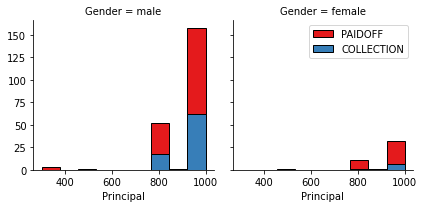

In [537]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

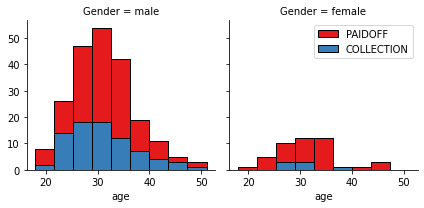

In [538]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


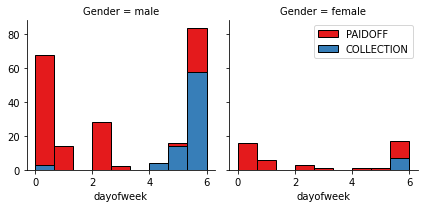

In [539]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [540]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [541]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [542]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,0,6,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,0,6,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,0,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,0,0,0


## One Hot Encoding

#### How about education?


In [543]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [544]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [545]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature#.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0,1,0
342,1000,30,25,0,1,0,1,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


### Feature Selection


Let's define feature sets, X:


In [546]:
X = Feature
X.shape
#X[0:5]

(346, 8)

What are our lables?


In [547]:
y = df['loan_status'].values
y.shape
#y [0:5]

(346,)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [548]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X.shape
#X[0:5]

(346, 8)

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [549]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) #split our 364 person data set into train and test sets
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#from sklearn.neighbors import KNeighborsClassifier
#k = 4
#Train Model and Predict  
#neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#neigh

#yhat = neigh.predict(X_test)
#yhat[0:5]

#from sklearn import metrics
#print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
#print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [550]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat =neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

#KNN
k = 7
#Train Model and Predict  
neighbours = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighbours

yhat = neighours.predict(X_test)
yhat[0:5]

print("KNN Train set Accuracy for k = 7: ", metrics.accuracy_score(y_train, neighbours.predict(X_train)))
print("KNN Test set Accuracy for k = 7: ", metrics.accuracy_score(y_test, yhat))

KNN Train set Accuracy for k = 7:  0.8043478260869565
KNN Test set Accuracy for k = 7:  0.7714285714285715


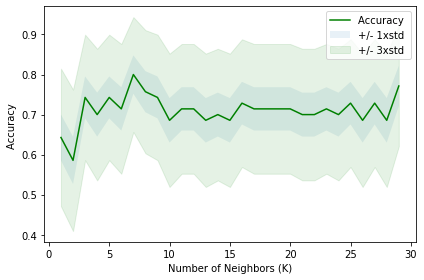

The best (Jaccard equivalent) accuracy was...  0.8 with k= 7


In [551]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best (Jaccard equivalent) accuracy was... ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

# Decision Tree


In [552]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3) #split our 346 person data set into train and test

In [553]:
#Purifying the nodes
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
print(loanTree) # it shows the default parameters

loanTree.fit(X_trainset,y_trainset) #fit the model with train set

predTree = loanTree.predict(X_testset) #create prediction tree with test set
print (X_testset.shape)
print (predTree.shape)

DecisionTreeClassifier(criterion='entropy', max_depth=3)
(104, 8)
(104,)


(104,)
(104,)
DecisionTrees's (Jaccard equivalent) Accuracy:  0.6730769230769231
DecisionTree's F1 Score is:  0.6688856015779093


[Text(0.4444444444444444, 0.875, 'X[4] <= -0.188\nentropy = 0.801\nsamples = 242\nvalue = [59, 183]'),
 Text(0.2222222222222222, 0.625, 'X[7] <= 0.14\nentropy = 0.139\nsamples = 102\nvalue = [2, 100]'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.0\nsamples = 60\nvalue = [0, 60]'),
 Text(0.3333333333333333, 0.375, 'X[2] <= 1.254\nentropy = 0.276\nsamples = 42\nvalue = [2, 40]'),
 Text(0.2222222222222222, 0.125, 'entropy = 0.179\nsamples = 37\nvalue = [1, 36]'),
 Text(0.4444444444444444, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.625, 'X[1] <= -1.46\nentropy = 0.975\nsamples = 140\nvalue = [57, 83]'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7777777777777778, 0.375, 'X[6] <= 0.128\nentropy = 0.982\nsamples = 135\nvalue = [57, 78]'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.931\nsamples = 78\nvalue = [27, 51]'),
 Text(0.8888888888888888, 0.125, 'entropy = 0.998\nsamples = 57\nvalue = [30, 27]')

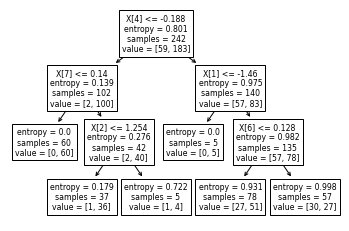

In [554]:
from sklearn import metrics
import matplotlib.pyplot as plt
print (y_testset.shape)
print (predTree.shape)
print("DecisionTrees's (Jaccard equivalent) Accuracy: ", metrics.accuracy_score(y_testset, predTree)) # <-- Jaccard equivalent

#from sklearn.metrics import f1_score
print ("DecisionTree's F1 Score is: ", f1_score(y_testset, predTree, average='weighted')) #<-- f1 score

#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y
from sklearn import tree
tree.plot_tree(loanTree)

#from matplotlib import pyplot as plt
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=720)
#tree.plot_tree(loanTree, filled=True)
#plt.show()

# Support Vector Machine


In [507]:
#Calcualuting optimal hyperplane to separate data
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split( X, y, test_size=0.2, random_state=4) # split our 346 person data into train and test
print ('Train set:', X_trainSVM.shape,  y_trainSVM.shape)
print ('Test set:', X_testSVM.shape,  y_testSVM.shape)

from sklearn import svm
loan = svm.SVC(kernel='rbf') #select kernel to radial based function (can also use linear, polynomial or sigmoid)
loan.fit(X_trainSVM, y_trainSVM)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


SVC()

In [508]:
yhatSVM = loan.predict(X_testSVM)
print (X_testSVM.shape)
yhatSVM.shape

(70, 8)


(70,)

              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70

Confusion matrix, without normalization
[[ 4 11]
 [ 7 48]]

The Jaccard score for SVM is... 0.7272727272727273
The f1 score for SVM is...  0.7275882012724117
The log loss for SVM is... 0.5772287609479654


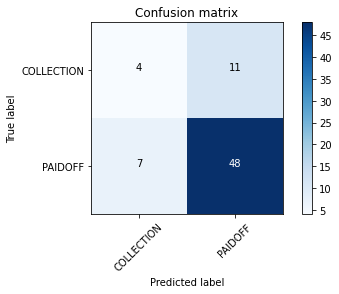

In [509]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix = confusion_matrix(y_testSVM, yhatSVM, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(y_testSVM, yhatSVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix') 
   

from sklearn.metrics import jaccard_score
#jaccard_score(y_test, yhat,pos_label=2)
print ("\nThe Jaccard score for SVM is...", jaccard_score(y_testSVM, yhatSVM, pos_label='PAIDOFF'))
    
from sklearn.metrics import f1_score
print("The f1 score for SVM is... ", f1_score(y_testSVM, yhatSVM, average='weighted'))

from sklearn.metrics import log_loss
yhatSVM_prob = LR.predict_proba(X_test)
yhatSVM_prob
print("The log loss for SVM is...", log_loss(y_testSVM, yhatSVM_prob))


# Logistic Regression


In [510]:
#Calculating the probability that y is of a certain class. y_hat = sigma (theta .* transposeX)
from sklearn.model_selection import train_test_split
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split( X, y, test_size=0.2, random_state=4) #split our 346 person data set into train and test
print ('Train set:', X_trainLR.shape,  y_trainLR.shape)
print ('Test set:', X_testLR.shape,  y_testLR.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [511]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainLR,y_trainLR)
print(LR)

yhatLR = LR.predict(X_testLR)
print(yhatLR)

yhat_probLR = LR.predict_proba(X_testLR) #probability being of class... PAIDOFF?
yhat_probLR [1:6]

LogisticRegression(C=0.01, solver='liblinear')
['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


array([[0.45, 0.55],
       [0.31, 0.69],
       [0.34, 0.66],
       [0.32, 0.68],
       [0.32, 0.68]])

In [512]:
#Jaccard score
from sklearn.metrics import jaccard_score
print ("The Jaccard score for LR is... ", jaccard_score(y_testLR, yhatLR, pos_label='PAIDOFF'))
#f1 score
from sklearn.metrics import f1_score
print ("The f1 score for LR is... ", f1_score(y_testLR, yhatLR, average='weighted'))

The Jaccard score for LR is...  0.6764705882352942
The f1 score for LR is...  0.6670522459996144


# Model Evaluation using Test set


In [513]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [514]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-06-09 15:26:42--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-06-09 15:26:43 (1.18 GB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [515]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [516]:
#Preprocessing test data like above for original data
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
#df.head()

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
#test_df.head()

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
#df.head()
#df

FeatureTest = test_df[['Principal','terms','age','Gender','weekend']]
FeatureTest = pd.concat([FeatureTest,pd.get_dummies(test_df['education'])], axis=1)
FeatureTest.drop(['Master or Above'], axis = 1,inplace=True)
print(FeatureTest.head())

XTest = FeatureTest
yTest = test_df['loan_status'].values

XTest= preprocessing.StandardScaler().fit(XTest).transform(XTest)

   Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   50       1        0         1                     0   
1        300      7   35       0        1         0                     0   
2       1000     30   43       1        1         0                     1   
3       1000     30   26       0        1         0                     0   
4        800     15   29       0        1         1                     0   

   college  
0        0  
1        0  
2        0  
3        1  
4        0  


In [529]:
#KNN
yhatKNN = neighbours.predict(XTest) #<--- New prediction with new test data 
#print("KNN Jaccard index: %.2f" % jaccard_similarity_score(yTest, yhatKNN))
#print("KNN F1-score: %.2f" % f1_score(test_y, knn_yhat, average='weighted') )

print("KNN Test set Accuracy for k = 7: ", metrics.accuracy_score(yTest, yhatKNN))

#Decision Tree
predictionTree = loanTree.predict(XTest) #<--- Create prediction tree with new test set

#print (XTest.shape)
#print (predTree.shape)

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's (Jaccard equivalent) Accuracy: ", metrics.accuracy_score(yTest, predictionTree))
from sklearn.metrics import f1_score
print("DecisionTree's F1 Accuracy: ", f1_score(yTest, predictionTree, average='weighted'))

#SVM
yhatSVM = loan.predict(XTest) #<-- New prediction with new test data
yhatSVM [0:5]
from sklearn.metrics import jaccard_score #<-- Jaccard
print("SVM Jaccard Index is...", jaccard_score(yTest, yhatSVM,pos_label='PAIDOFF'))
from sklearn.metrics import f1_score
print("SVM F1 Score is...", f1_score(y_test, yhat, average='weighted')) #<-- F1 score

KNN Test set Accuracy for k = 7:  0.6851851851851852
DecisionTree's (Jaccard equivalent) Accuracy:  0.8148148148148148
DecisionTree's F1 Accuracy:  0.8148148148148148
SVM Jaccard Index is... 0.78
SVM F1 Score is... 0.7714285714285715


In [426]:
#from sklearn.linear_model import LogisticRegression
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)
#print(LR)


yhat2LR_prob = LR.predict_proba(X2)
yhat2LR_prob

#Jaccard score
from sklearn.metrics import jaccard_score
print ("The Jaccard score is... ", jaccard_score(y2, yhat2LR, pos_label='PAIDOFF'))

#F1 score
from sklearn.metrics import f1_score
print ("The f1 score is... ", f1_score(y2, yhat2LR, average='weighted'))

#Print log-loss
from sklearn.metrics import log_loss
print("The log-loss is...",log_loss(y2, yhat2LR_prob))

The Jaccard score is...  0.7407407407407407
The f1 score is...  0.6304176516942475
The log-loss is... 0.6037871272191607


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
